# ***Cleaning Data in Python***

## Course Description
It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions. Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

### Content
1. Common data problems:

        - Type constrain

        - Range constrain(date, numeric interval,etc.)
    
        - Uniqueness constrain (Duplicated)
2. Text and categorical data problems

        - membership constrain(out of the levels or categories which have been predefined)

        - Categorical variables(typo, upper or lower case)
                - Capitalization
                - Constructure the interval
                - Regroup the levels

        - Text data
                - remove the elements in text data
                - keep the certain length of the text data
3. Advanced data problems
        
        -Uniformity(weight,height,date)

        -Cross filed validation within the columns(columns A + B = C )

        -Completeness. Treat the missing data.

4. Record linkage

        - String compare
        
        - join the similar tables without a identified column(the case when 'join' method is not working)

## 1. Common data problems

In this chapter, you'll learn how to overcome some of the most common dirty data problems. You'll convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

[1.1] Data type constraints


In [5]:
import pandas as pd
import numpy as np


In [2]:
ride_sharing = pd.read_csv('ride_sharing_new.csv')
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


***The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.***


The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1 for free riders.
2 for pay per ride.
3 for monthly subscribers.

----------------------

- Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.

- Make sure you converted user_type_cat correctly by using an assert statement.

In [3]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

Summing strings and concatenating numbers

In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

-----------------------

- Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
- Convert duration_trim to int and store it in the duration_time column.
- Write an assert statement that checks if duration_time's data type is now an int.
- Print the average ride duration.

In [9]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


[1.2] Data range constraints

How to deal with out of range data?

- *Dropping data*

- *Setting custom minimums and maximums*

- *Treat as missing and impute*

- *Setting custom value depending on business assumptions*

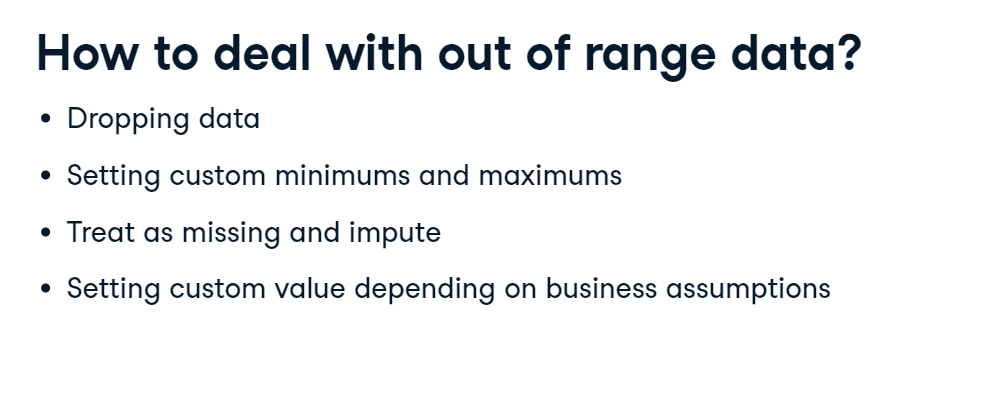

In [13]:
from IPython.display import Image
import datetime as dt
Image('deal with ourt of range data.png',width = 1000,height=500)


-----------------------

1.2.1 Tire size constraints

In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.


-------------------------------

- Convert the tire_sizes column from category to 'int'.
- Use .loc[] to set all values of tire_sizes above 27 to 27.
- Reconvert back tire_sizes to 'category' from int.
- Print the description of the tire_sizes.

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

-------------------
1.2.2 Back to the future

A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now.

------------------

- Convert ride_date to a datetime object using to_datetime(), then convert the datetime object into a date and store it in ride_dt column.
- Create the variable today, which stores today's date by using the dt.date.today() function.
- For all instances of ride_dt in the future, set them to today's date.
- Print the maximum date in the ride_dt column.

In [ ]:

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

ride_sharing.columns
# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

[1.3] Uniqueness constraints

to Address the duplidcated values


How to find duplicate rows?

2 types of duplicate: ***complete*** and ***incomplete***


------------------

The .duplicated() method :

subset : List of column names to check for duplication.

keep : Whether to keep first ( 'first' ), last ( 'last' ) or all ( False ) duplicate values.

***Column names to check for duplication***

column_names = ['first_name','last_name','address']

duplicates = height_weight.duplicated(subset = column_names, keep = False)

------------------------------

How to treat duplicate values?

The .drop_duplicates() method

subset : List of column names to check for duplication.

keep : Whether to keep first ( 'first' ), last ( 'ast' ) or all ( False ) duplicate values.

inplace : Drop duplicated rows directly inside DataFrame without creating new object ( True ).

 ***Drop duplicates***
 
height_weight.drop_duplicates(inplace = True)

-------------------------

Finding duplicates

A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

---------------------------

- Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.

- Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.

- Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.


In [16]:
ride_sharing = pd.read_csv('ride_duplicated.txt')

In [17]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id',ascending = True)

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


-----------------------
Treating duplicates

In the last exercise, you were able to verify that the new update feeding into ride_sharing contains a bug generating both complete and incomplete duplicated rows for some values of the ride_id column, with occasional discrepant values for the user_birth_year and duration columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average duration, and the minimum user_birth_year for each set of incomplete duplicate rows.

------------------------------

- Drop complete duplicates in ride_sharing and store the results in ride_dup.
- Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
- Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
- Find duplicates again and run the assert statement to verify de-duplication.


In [18]:
# 1.Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# 2. Deal with the incomplete duplicates

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## 2. Text and categorical data problems

Categorical and text data can often be some of the messiest parts of a dataset due to their unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

[2.1] Membership constrain

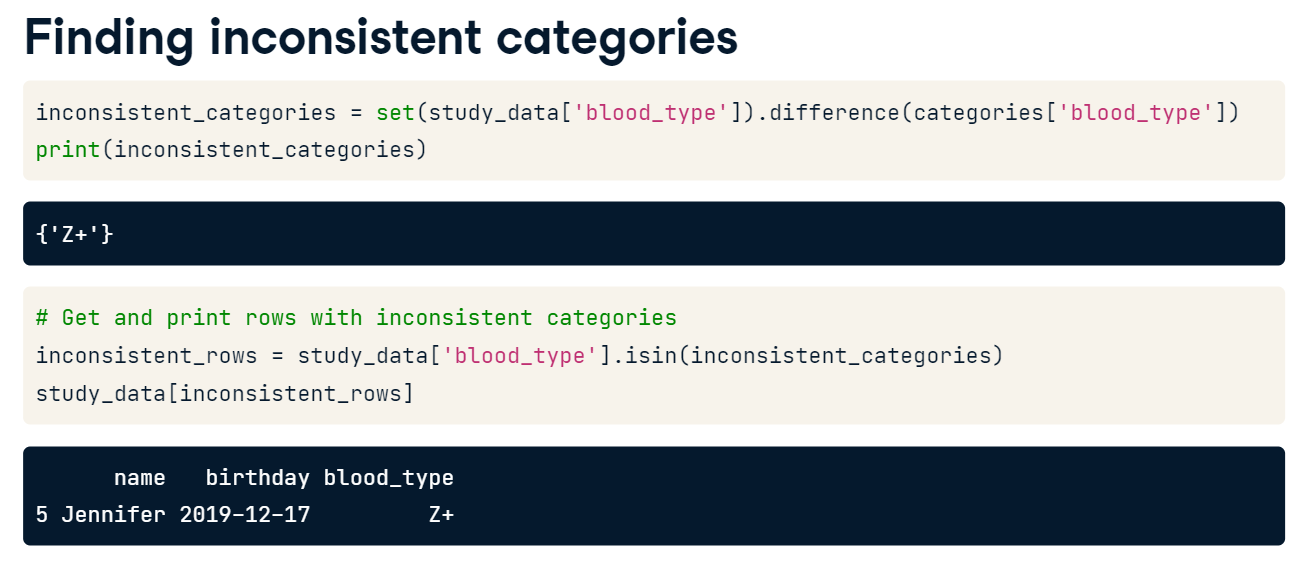

In [26]:
Image('How do we treat the problem of category data .png',width = 1000, height = 500)

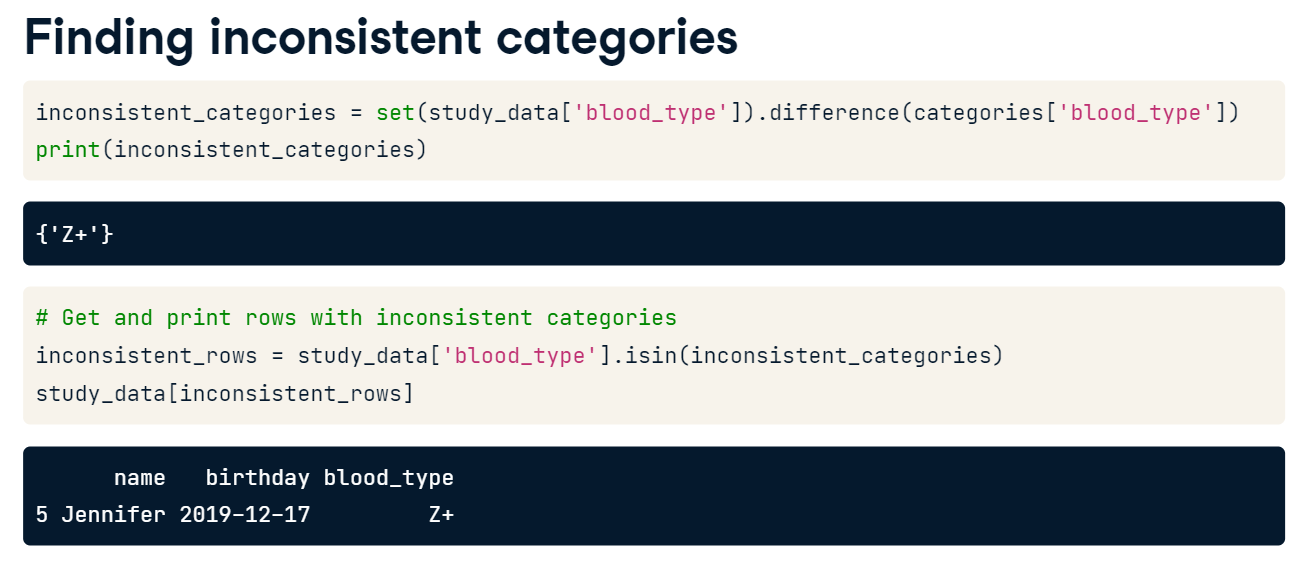

In [22]:
Image('finding the inconsistent categories.png',width=1000,height=500)

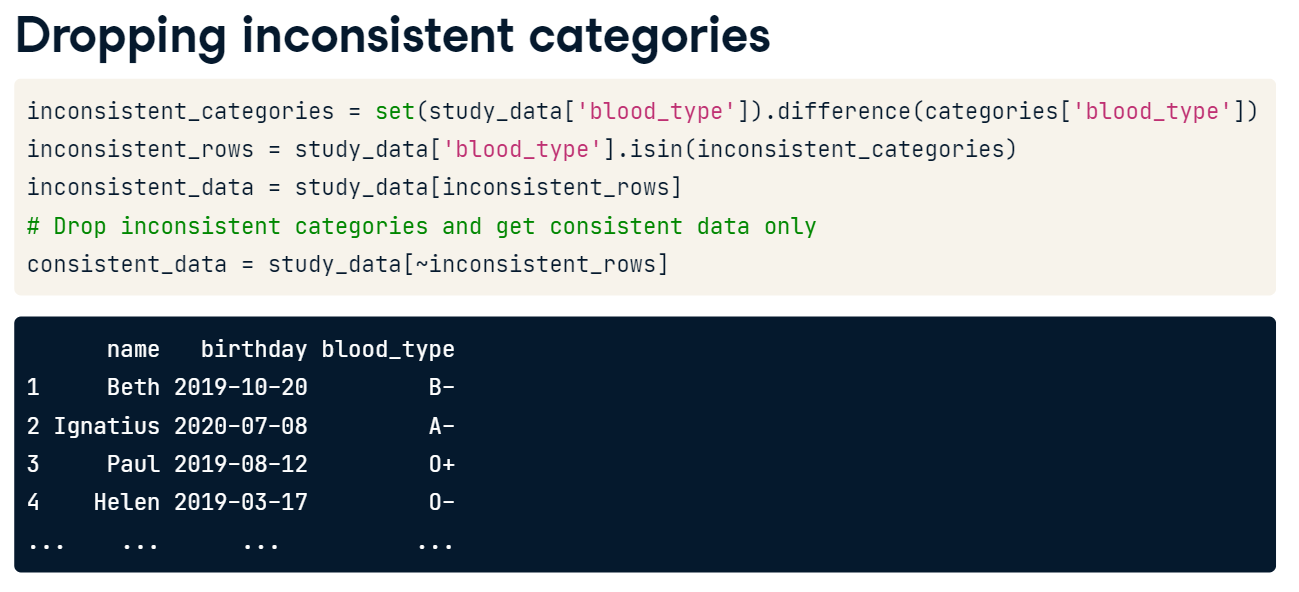

In [25]:
Image('drop inconsistent categories.png',width=1000,height= 500)

In [23]:
#Set up catetories dictionary

categories = {'cleanliness':['cleanliness','Clean','safety','Neutral','satisfaction','Very satisfied'],
'safety':['cleanliness','Average',
'safety','Very safe',
'satisfaction','Neutral'],'satisfaction':['cleanliness','Somewhat clean',
'safety','Somewhat safe',
'satisfaction','Somewhat satisfied']}

categories = pd.DataFrame(categories)

airlines = pd.read_csv('airlines_final.csv')

----------------
Finding consistency
In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The pandas package has been imported as pd, and the airlines and categories DataFrames are in your environment.

----------------------

- Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in airlines using the .unique() method.


In [24]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(),"\n")

      cleanliness        safety        satisfaction
0     cleanliness   cleanliness         cleanliness
1           Clean       Average      Somewhat clean
2          safety        safety              safety
3         Neutral     Very safe       Somewhat safe
4    satisfaction  satisfaction        satisfaction
5  Very satisfied       Neutral  Somewhat satisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



- Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
- Find rows of airlines with a cleanliness value not in categories and print the output.


In [25]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

      Unnamed: 0    id        day         airline   destination  \
2              2  2820   Thursday           DELTA   LOS ANGELES   
4              4  2992  Wednesday        AMERICAN         MIAMI   
5              5   634   Thursday          ALASKA        NEWARK   
7              8  2592   Saturday      AEROMEXICO   MEXICO CITY   
8              9   919     Friday      AIR CANADA       TORONTO   
...          ...   ...        ...             ...           ...   
2466        2798  3099     Sunday          ALASKA        NEWARK   
2468        2800  1942    Tuesday          UNITED        BOSTON   
2469        2801  2130   Thursday  CATHAY PACIFIC     HONG KONG   
2471        2803  2888  Wednesday          UNITED        AUSTIN   
2472        2804  1475    Tuesday          ALASKA  NEW YORK-JFK   

        dest_region  dest_size boarding_area   dept_time  wait_min  \
2           West US        Hub   Gates 40-48  2018-12-31      70.0   
4           East US        Hub   Gates 50-59  2018-12-3

- Print the rows with the consistent categories of cleanliness only.

In [26]:
# Print rows with *consistent* categories only
print(airlines[~cat_clean_rows])

      Unnamed: 0    id       day        airline        destination  \
0              0  1351   Tuesday    UNITED INTL             KANSAI   
1              1   373    Friday         ALASKA  SAN JOSE DEL CABO   
3              3  1157   Tuesday      SOUTHWEST        LOS ANGELES   
6              6  2578  Saturday        JETBLUE         LONG BEACH   
10            11  1129   Tuesday      SOUTHWEST          SAN DIEGO   
...          ...   ...       ...            ...                ...   
2470        2802   394    Friday         ALASKA        LOS ANGELES   
2473        2805  2222  Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684    Friday         UNITED            ORLANDO   
2475        2807  2549   Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162  Saturday  CHINA EASTERN            QINGDAO   

        dest_region dest_size boarding_area   dept_time  wait_min cleanliness  \
0              Asia       Hub  Gates 91-102  2018-12-31     115.0       Clean 

[2.2] Categorical variables

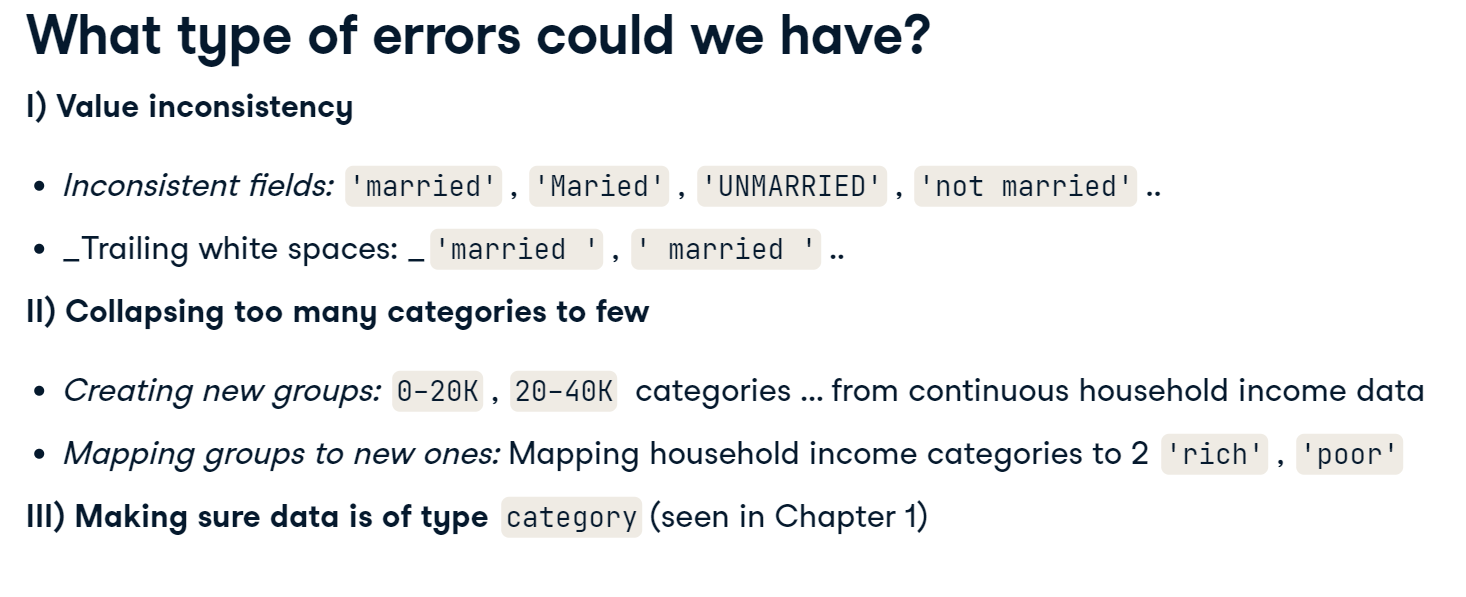

In [4]:
Image('typical errors of category data.png',width = 1000,height = 500)

- Capitalization : `df[column].str.upper()' or 'df[column].str.lower()'

- Trailing white spaces: 'df[column].str.string()'



- Construct the interval: 

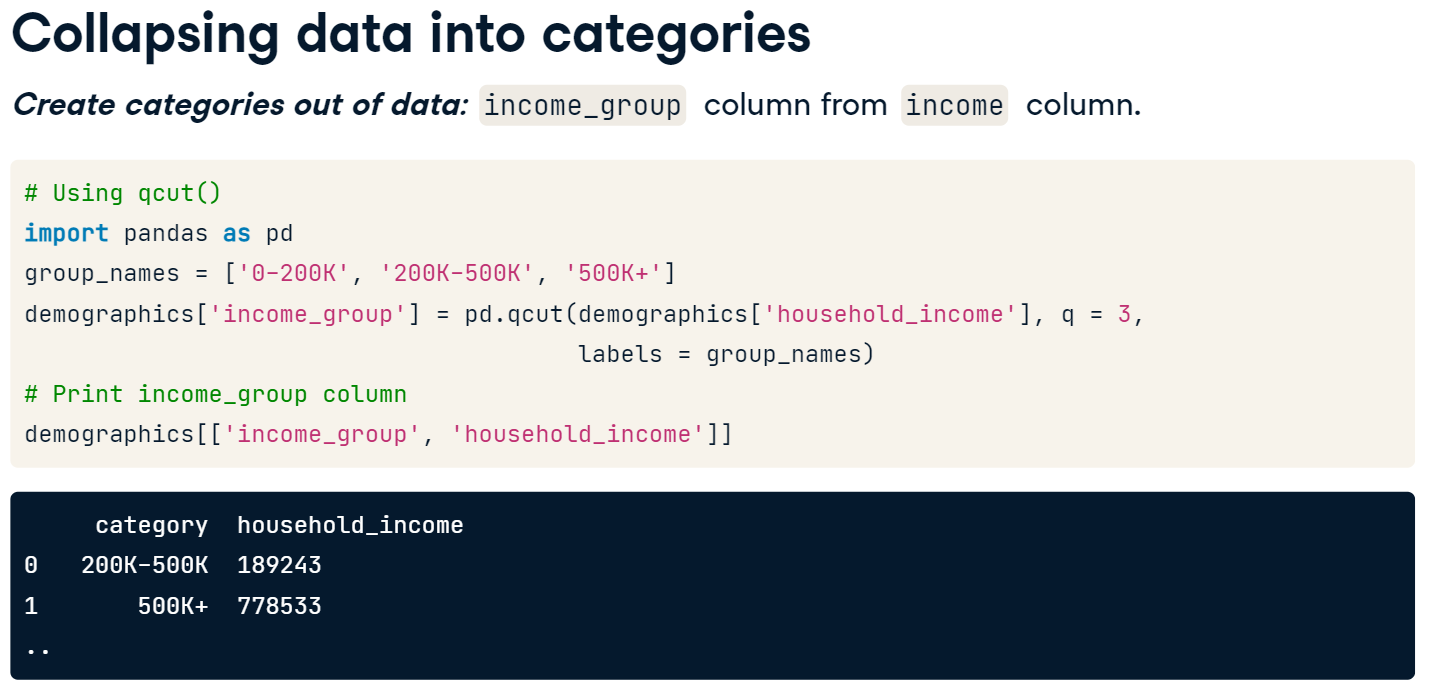

In [5]:
Image('relevel_1.png',width=1000,height=500)

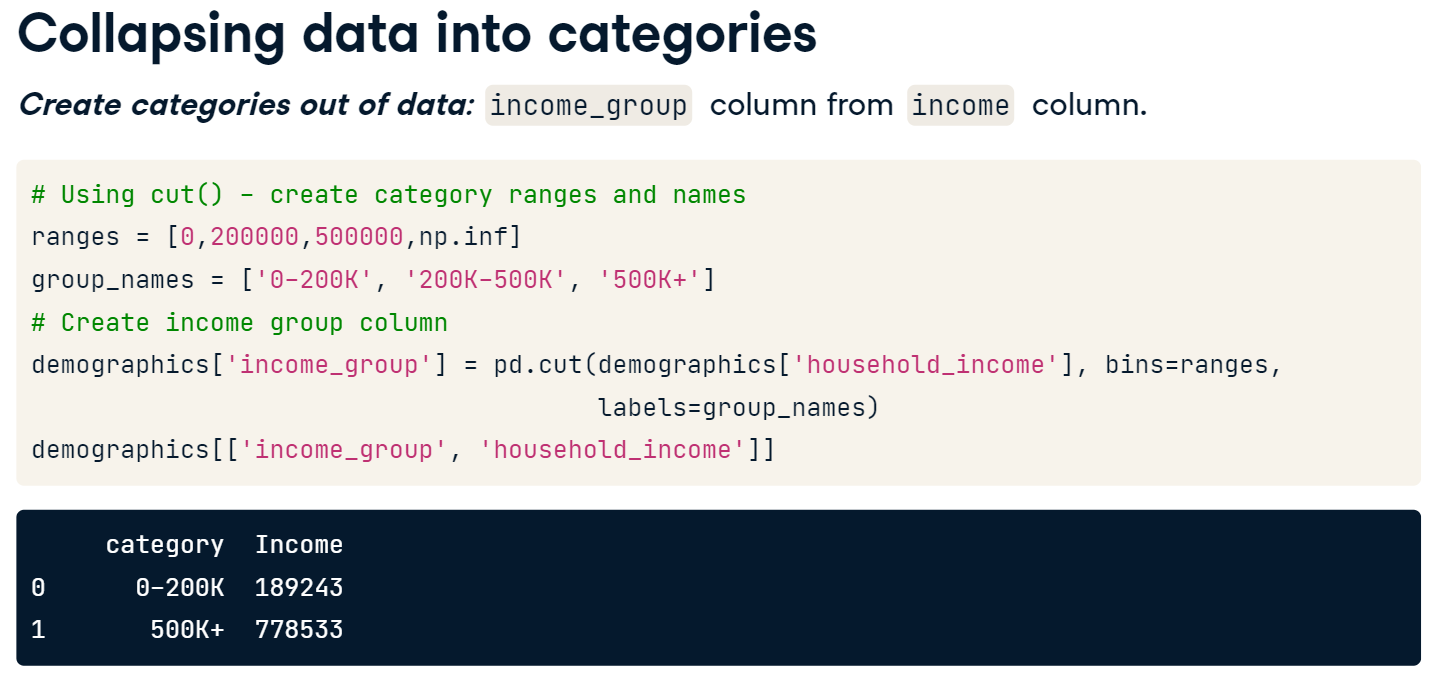

In [6]:
Image('relevel_2.png',width=1000,height=500)

- Regroup the levels:

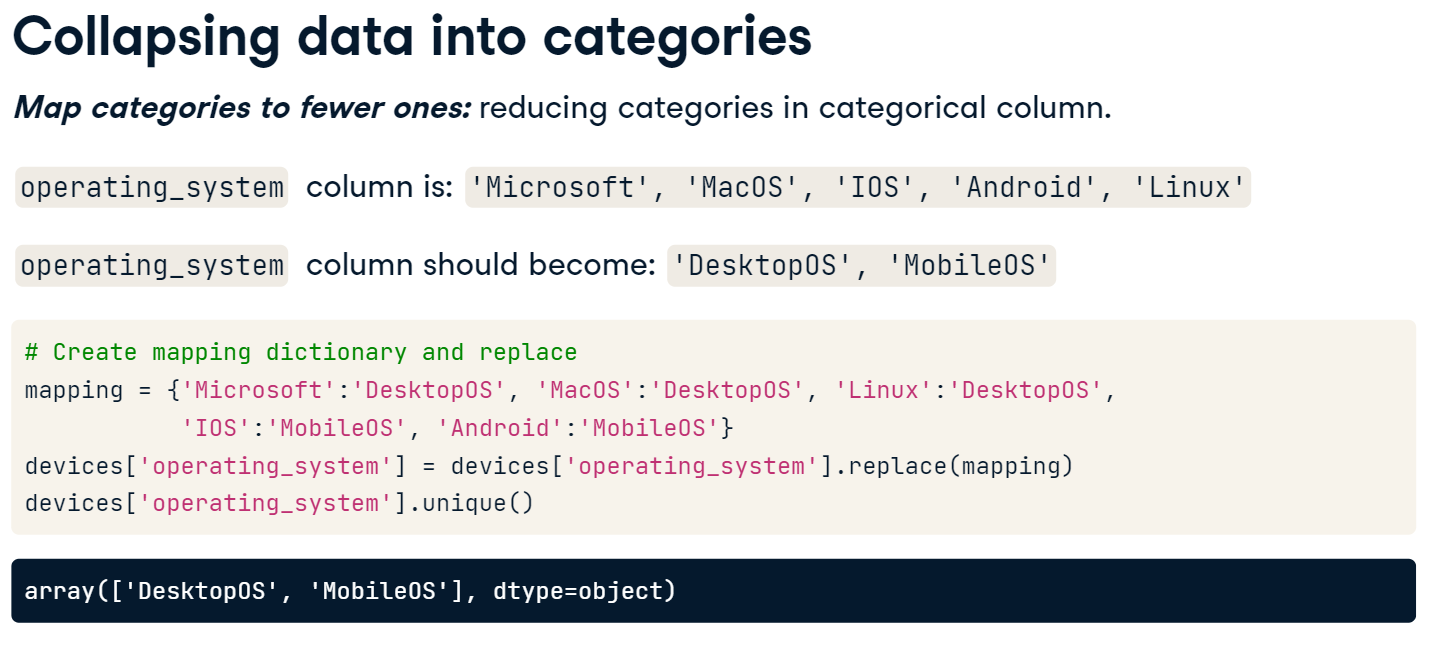

In [16]:
Image('regroup_levels.png',width=1000,height=500)

Inconsistent categories
---------------------
In this exercise, you'll be revisiting the airlines DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, dest_region and dest_size respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The pandas package has been imported as pd, and the airlines DataFrame is in your environment.

---------------------------

- Print the unique values in dest_region and dest_size respectively.
- Change the capitalization of all values of dest_region to lowercase.
- Replace the 'eur' with 'europe' in dest_region using the .replace() method.
- Strip white spaces from the dest_size column using the .strip() method.
- Verify that the changes have been into effect by printing the unique values of the columns using .unique() .

In [27]:
# Print unique values of both columns
print(airlines['dest_region'].unique(),'\n')
print(airlines['dest_size'].unique(),'\n')

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique(),'\n')
print(airlines['dest_size'].unique(),'\n')

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east'] 

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     '] 

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand'] 

['Hub' 'Small' 'Medium' 'Large'] 



Remapping categories
----------------
To better understand survey respondents from airlines, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The airlines DataFrame contains the day and wait_min columns, which are categorical and numerical respectively. The day column contains the exact day a flight took place, and wait_min contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.
The pandas and numpy packages have been imported as pd and np. Let's create some new categorical data!

-------------------------

- Create the ranges and labels for the wait_type column mentioned in the description.
- Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
- Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
- Create the day_week column by using .replace().

In [28]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

[2.3] Cleaning text data
- Typical issues
    - Length
    - Syntax( with specific type, e.g., phone number, address, etc. )

- Find
    - df[column].str.len()
    - df[column].str.contain('#|*')
    - regular expression
- Fix
    - df[column].str.replace('from','to')

- Check
    - asseret `expression' condition

Removing titles and taking names
-------------------------------
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".

Your ultimate objective is to create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The airlines DataFrame is in your environment, alongside pandas as pd.

---------------------------------------

- Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
- Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

In [35]:
airlines = pd.read_csv('airlines_name.txt')
airlines['full_name'].head(10)

0             Melodie Stuart
1            Dominic Shannon
2          Quintessa Tillman
3    Dr. Christine Nicholson
4            Regina Clements
5            Colleen Harding
6            Kaitlin Cochran
7               Molly Norton
8               Richard Lott
9             Matthew Nguyen
Name: full_name, dtype: object

In [32]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Mr.','')

# Replace "Miss" with empty string ""
airlines['full_name']  = airlines['full_name'].str.replace('Miss','')

# Replace "Ms." with empty string ""
airlines['full_name'] =  airlines['full_name'].str.replace('Ms.','')

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

d:\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
d:\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
d:\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


Keeping it descriptive
-----------------------

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the survey_response column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

The airlines DataFrame is in your environment, and pandas is imported as pd

-----------------------------------------------------------------------------------

- Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
- Isolate the rows of airlines with resp_length higher than 40.
- Assert that the smallest survey_response length in airlines_survey is now bigger than 40.

In [37]:
airlines = pd.read_csv('airlines_survey.txt')

In [38]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

17    The airport personnell forgot to alert us of d...
18    The food in the airport was really really expe...
19    One of the other travelers was really loud and...
20    I don't remember answering the survey with the...
21    The airport personnel kept ignoring my request...
22    The chair I sat in was extremely uncomfortable...
23    I wish you were more like other airports, the ...
24    I was really unsatisfied with the wait times b...
25    The flight was okay, but I didn't really like ...
26    We were really slowed down by security measure...
27    There was a spill on the aisle next to the bat...
28    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


## 3. Advanced data problems


In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.


**typical issues**

- Unformity
    - Date. 'pd.to_date(df[column], infer_datetime_formate = True, errors = 'coerce' )
    - Temperature
    - Height
    - Weight
    - Etc.


**Use plot to recognise the issues**


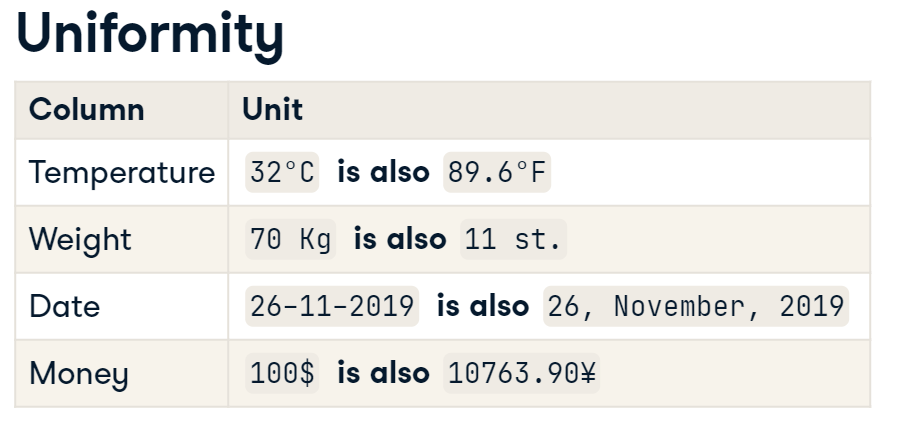

In [31]:
Image('general uniformity issues.png',width = 1000, height= 500)

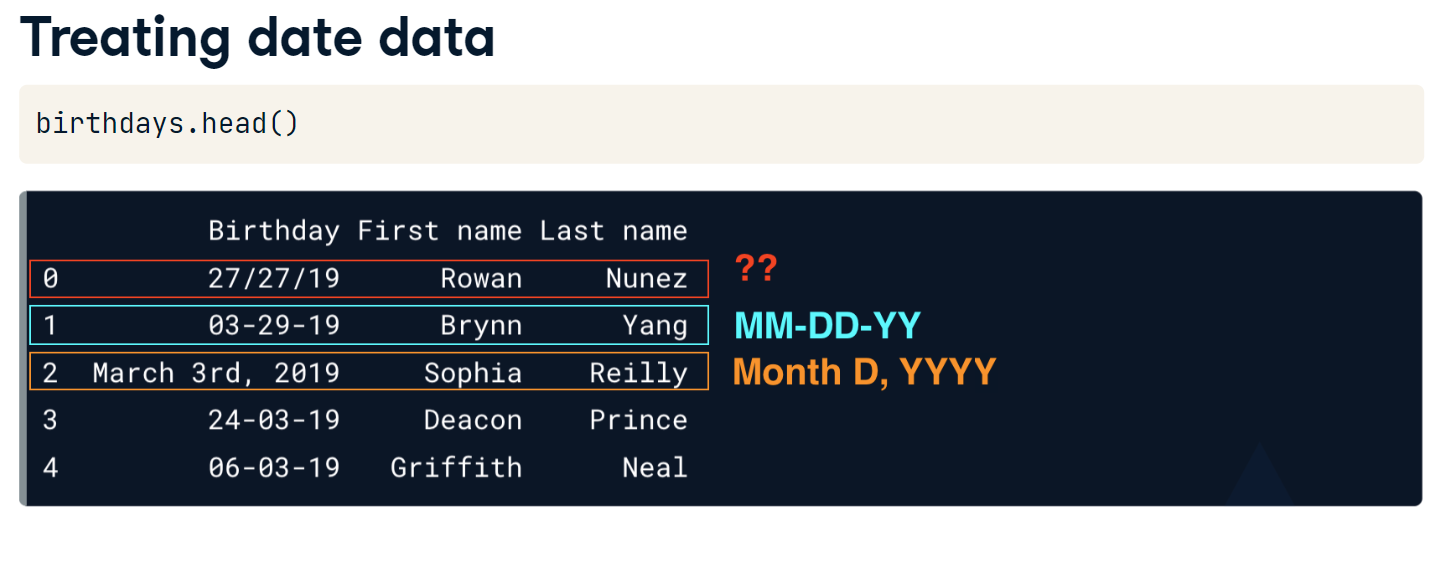

In [32]:
Image('general uniformity issues 2.png',width = 1000, height= 500)

[3.1]Uniform currencies

-------------------

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

----------------
- Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
- Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
- Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [49]:
# Load data
banking = pd.read_csv('banking.txt',sep=',')
banking = pd.DataFrame(banking)
print(banking.columns)

Index(['Unnamed: 0', 'cust_id', 'acct_amount', 'acct_cur', 'inv_amount',
       'account_opened', 'last_transaction'],
      dtype='object')


In [50]:

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

[3.2]Uniform dates

--------------

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

--------------

- Print the header of account_opened from the banking DataFrame and take a look at the different results.
- Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
- Extract the year from the amended account_opened column and assign it to the acct_year column.
- Print the newly created acct_year column.

In [51]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')  

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'],banking['account_opened'])

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object 0    2018-03-05
1    2018-01-21
2    2018-01-26
3    2017-08-21
4    2017-05-06
        ...    
92   2017-11-26
93   2018-07-14
94   2018-02-06
95   2017-05-28
96   2017-10-23
Name: account_opened, Length: 97, dtype: datetime64[ns]


[3.3] Cross field validation

- Find the inconsistancies
    - sum
    - age


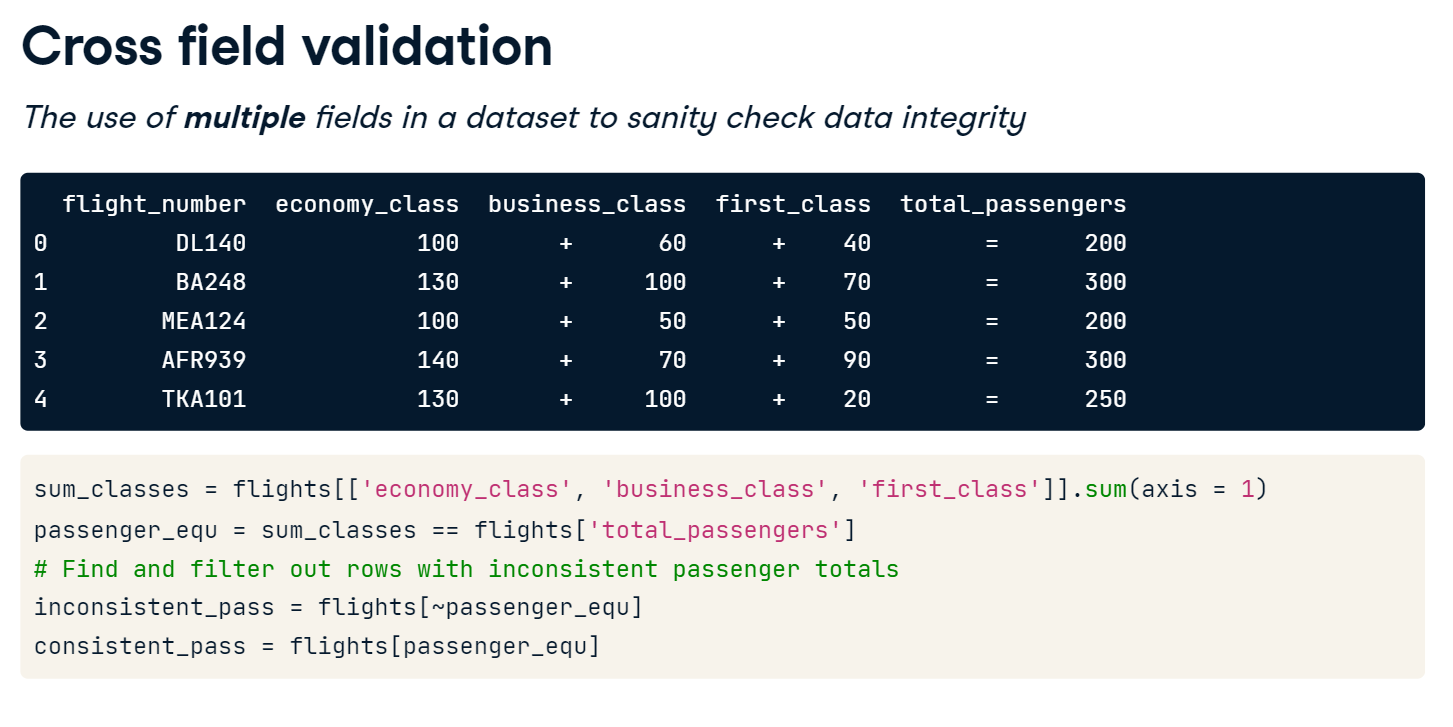

In [52]:
Image('cross field validation sum.png',width = 1000,height = 500)

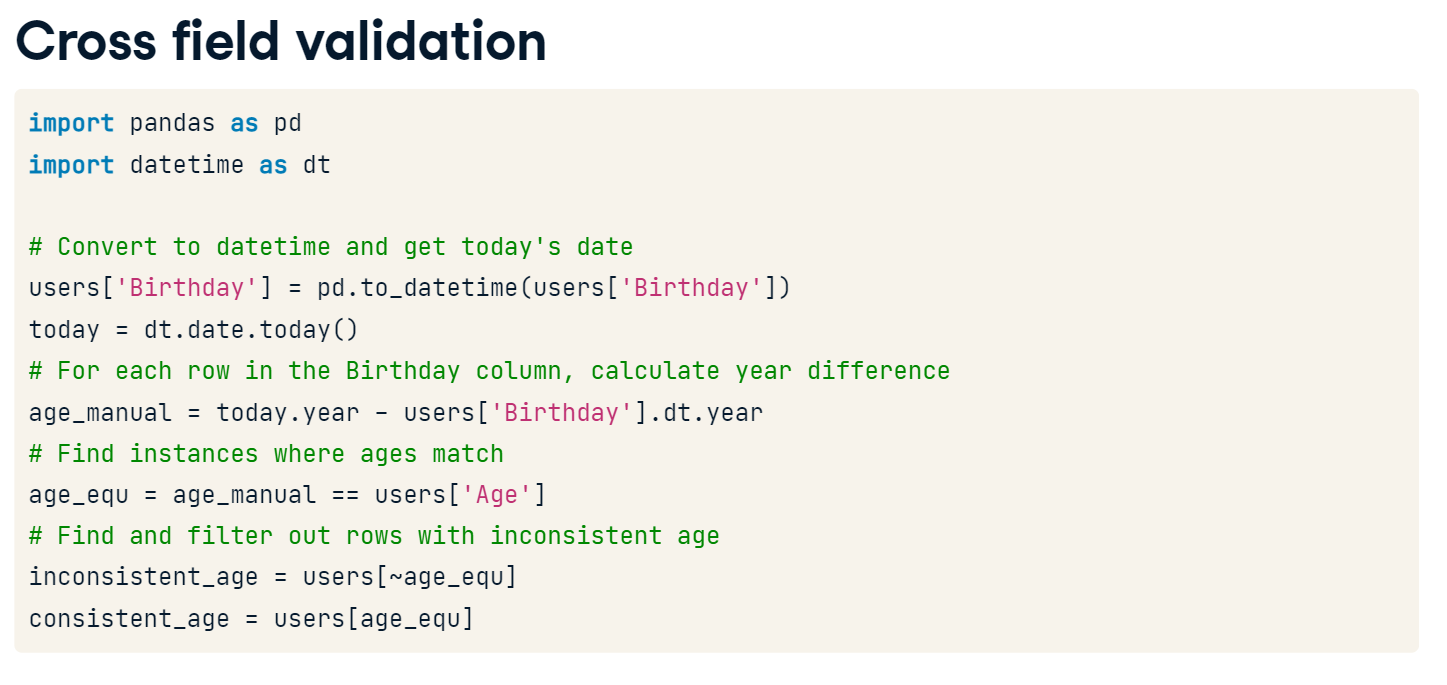

In [53]:
Image('cross field validation age.png',width = 1000,height = 500)

- Deal with the inconsitancies

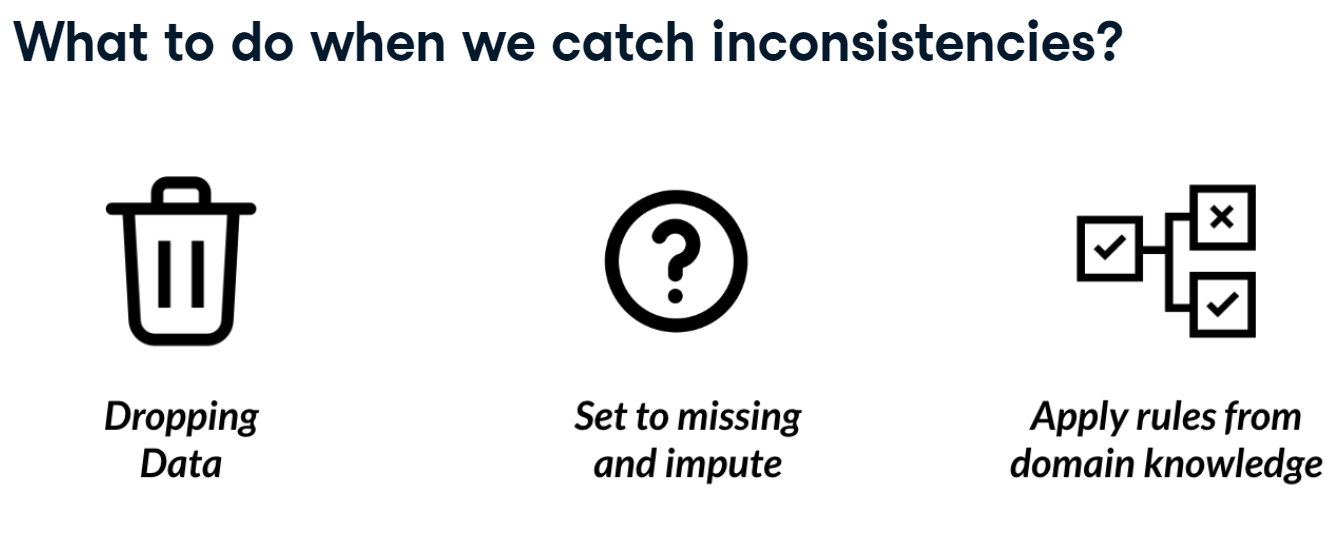

In [57]:
Image('deal with inconsistancies.png',width = 800,height = 500)

-------------------------
How's our data integrity?

New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

----------------------------

- Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
- Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.


- Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
- Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.


In [69]:
banking = pd.read_csv('banking_cross_field_vad.txt')
import datetime as dt

In [63]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[['fund_A', 'fund_B', 'fund_C', 'fund_D']].sum(axis = 1) == banking['inv_amount'] # axis = 1 means sum by row, whereas axis = 0 means sum by columns

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [77]:
# Store today's date and find ages
today = dt.date.today()

# Convert the date column into date type
banking['birth_date'] = pd.to_datetime(banking['birth_date'], errors='coerce')

ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


[3.4] Completeness

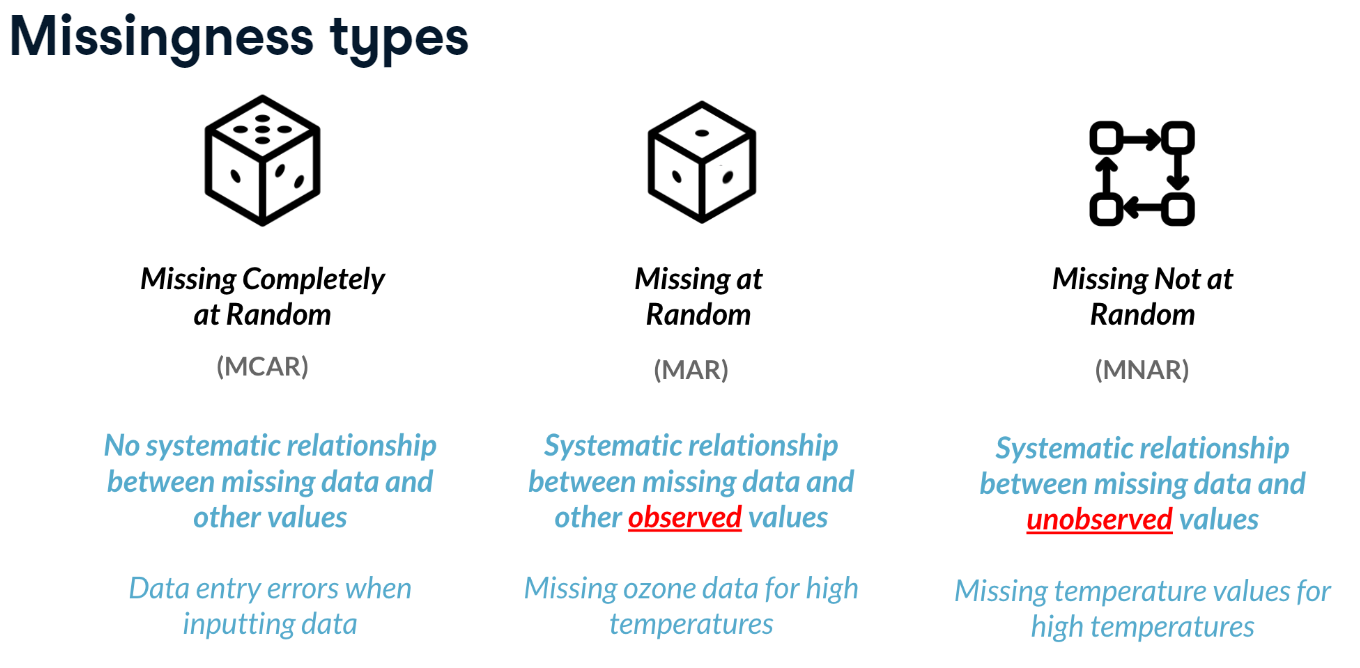

In [78]:
Image("missingness types.png",width = 1000,height= 500)

-----------------
Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

--------------------

- Print the number of missing values by column in the banking DataFrame.
- Plot and show the missingness matrix of banking with the msno.matrix() function.
- Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.


In [10]:
banking = pd.read_csv('banking_missing.txt')
import missingno as msno
import matplotlib.pyplot as plt

Unnamed: 0           0
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


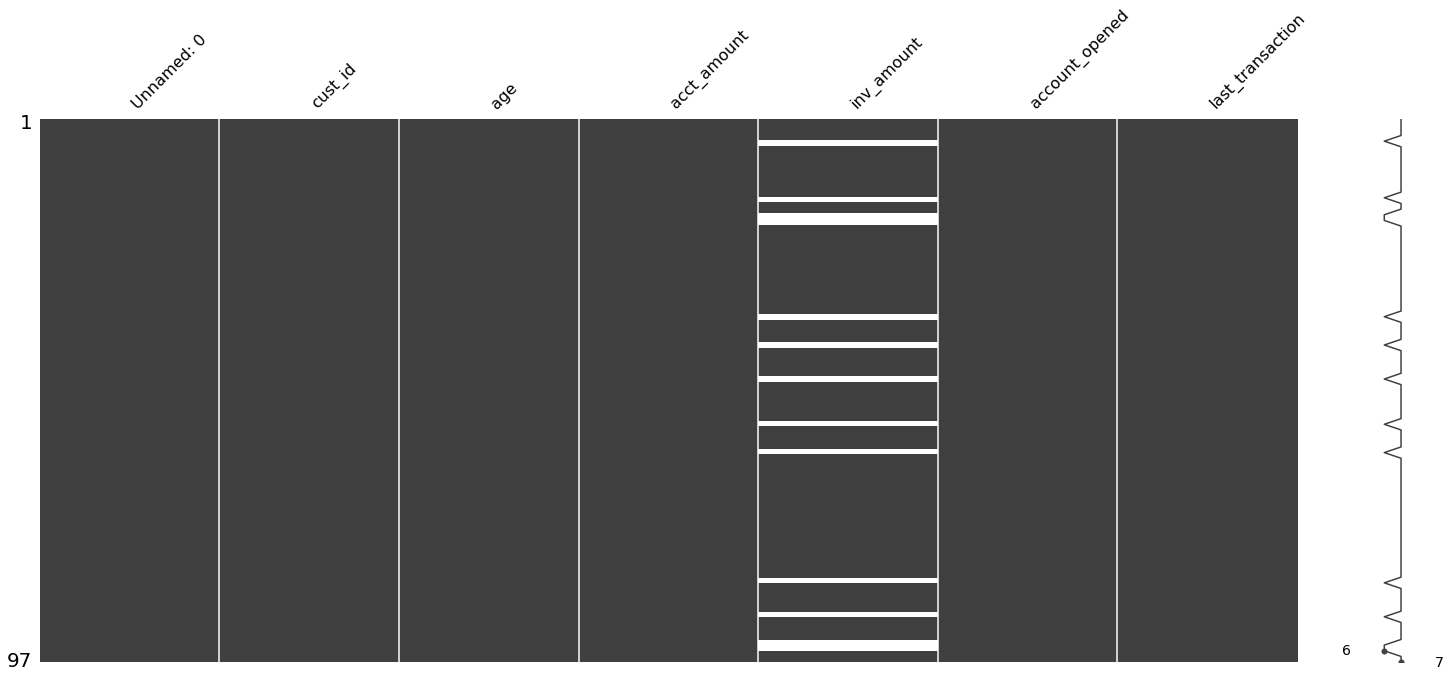

       Unnamed: 0        age    acct_amount    inv_amount
count   84.000000  84.000000      84.000000     84.000000
mean    47.761905  43.559524   75095.273214  44717.885476
std     27.724818  10.411244   32414.506022  26031.246094
min      0.000000  26.000000   12209.840000   3216.720000
25%     24.750000  34.000000   57373.062500  22736.037500
50%     48.500000  45.000000   83061.845000  44498.460000
75%     71.250000  53.000000   94165.965000  66176.802500
max     96.000000  59.000000  250046.760000  93552.690000        Unnamed: 0        age   acct_amount  inv_amount
count   13.000000  13.000000     13.000000         0.0
mean    49.538462  21.846154  73231.238462         NaN
std     31.902496   1.519109  25553.327176         NaN
min      4.000000  20.000000  21942.370000         NaN
25%     18.000000  21.000000  66947.300000         NaN
50%     46.000000  21.000000  86028.480000         NaN
75%     82.000000  23.000000  89855.980000         NaN
max     94.000000  25.000000  99998.35

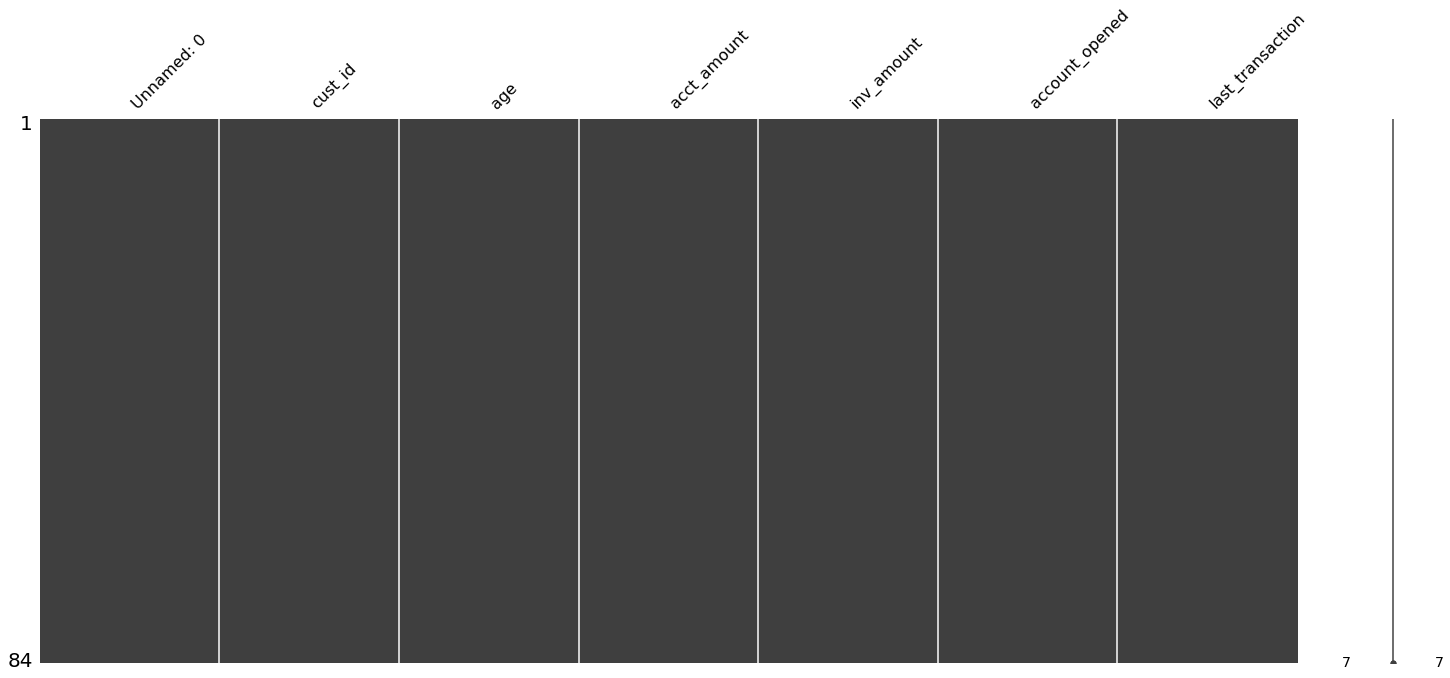

In [11]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]


#The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.

print(investors.describe(), missing_investors.describe())

# Sort banking by age and visualize
banking_sorted = investors.sort_values('age',ascending= True)
msno.matrix(banking_sorted)
plt.show()

-------------------
Follow the money

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

-------------------

- Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
- Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
- Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [90]:
banking = pd.read_csv('banking_FollowTheMoney.txt')

In [91]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())



Unnamed: 0          0
cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64


## 4. Record linkage

Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

[4.1] Compare string [single column]

- create a serie or a list which contains the correct categories
- match the correct categories and the origin column use `process.extract()'
- find out the cut-off point by observe the similarity score
- replace the the categories of origin categories which greater than cut-off point with the correct categories.

---------------
The concept behind how to compare different string:

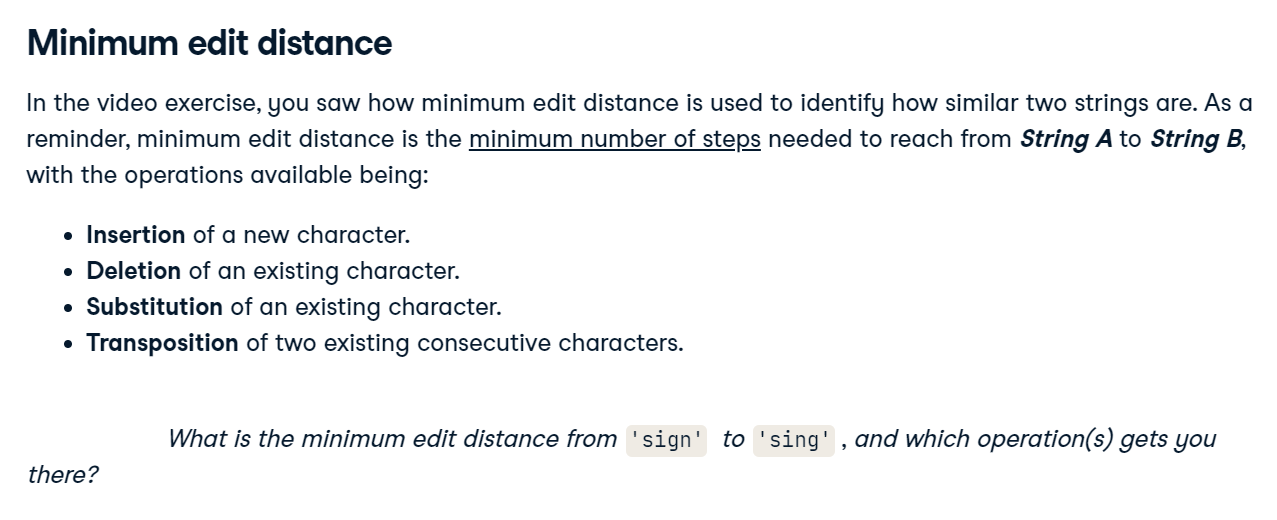

In [92]:
Image("minimum edit distance.png",width = 1000,height= 500)

Answer : **1 by transposing 'g' with 'n'.**

-----------------------------------

The cutoff point

In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the cuisine_type column is riddled with typos, and should contain only italian, american and asian cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's process.extract() function by finding the similarity score of the most distant typo of each category.

------------

- Import process from thefuzz.
- Store the unique cuisine_types into unique_types.
- Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.
- Find out the cut-off point by observe the **smilarity score**

In [8]:
restaurants = pd.read_csv('restaurants_cutoff.txt')

In [122]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()


# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)),'\n')

print(process.extract('american', unique_types, limit= len(unique_types)),'\n')

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian',unique_types,limit = len(unique_types)),'\n')

# The cut-off point at 80

[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)] 

[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian', 53),

---------------

Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's extract() function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

(closest match, similarity score, index of match)
The restaurants DataFrame is in your environment, and you have access to a categories list containing the correct cuisine types ('italian', 'asian', and 'american').

--------------------

- Return all of the unique values in the cuisine_type column of restaurants.

In [123]:
# Set-up a correct categories
categories = ['italian', 'asian', 'american']

# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())


['american' 'asian' 'italian']


[4.2]Generating pairs(more than 1 columns)

Motivation

    join two tables but without a consistant primary key (no common unique identifier between the DataFrames)

Concept

    Record linkage is the act of linking data from different sources regarding the same entity. Generally, we clean two or more DataFrames, generate pairs of potentially matching records, score these pairs according to string similarity and other similarity metrics, and link them.

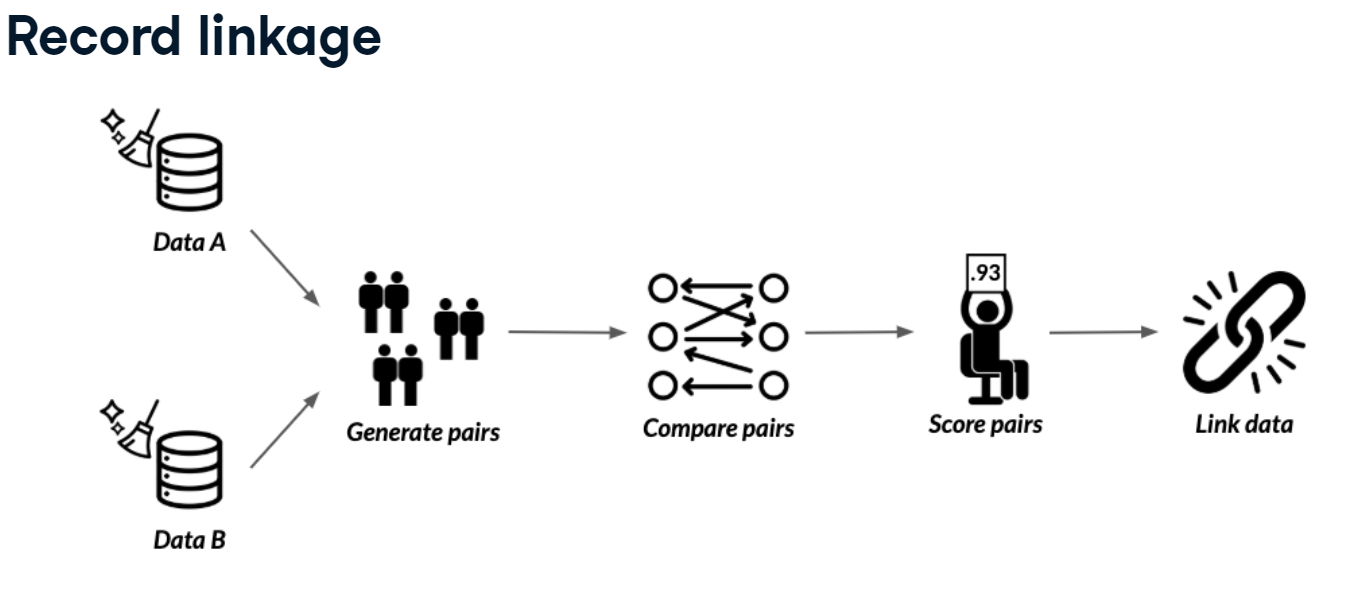

In [3]:
Image('record linkage.png', width=1000, height=500)

---------------

Pairs of restaurants

In the last lesson, you cleaned the restaurants dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named restaurants_new with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the cuisine_type and city columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with restaurants.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new. Both DataFrames, pandas and recordlinkage are in your environment.

-----------------------

- Instantiate an indexing object by using the Index() function from recordlinkage.
- Block your pairing on cuisine_type by using indexer's' .block() method.
- Generate pairs by indexing restaurants and restaurants_new in that order.

In [7]:
import recordlinkage

In [9]:
restaurants

,Unnamed: 0,rest_name,rest_addr,city,phone,cuisine_type
0,0,arnie morton s of chicago,435 s. la cienega blv .,los angeles,3102461501,america
1,1,art s delicatessen,12224 ventura blvd.,studio city,8187621221,merican
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,amurican
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,americen
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,americann
...,...,...,...,...,...,...
282,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
283,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
284,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
285,334,wu kong,101 spear st.,san francisco,4159579300,asian


Find the similarity

----------------

- Instantiate a comparison object using the recordlinkage.Compare() function.
- Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.
- Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.
- Compute the comparison of the pairs by using the .compute() method of comp_cl.


In [10]:
restaurants_new = pd.read_csv('restaurant_new.txt')
restaurants = pd.read_csv('restaurants_linkage.txt')

In [11]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


Link togther

---------------

- Isolate instances of potential_matches where the row sum is above or equal to 3 by using the .sum() method.
- Extract the second column index from matches, which represents row indices of matching record from restaurants_new by using the .get_level_values() method.
- Subset restaurants_new for rows that are not in matching_indices.
- Append non_dup to restaurants.

In [12]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

    Unnamed: 0                  rest_name                  rest_addr  \
0            0  arnie morton's of chicago   435 s. la cienega blv .    
1            1         art's delicatessen       12224 ventura blvd.    
2            2                  campanile       624 s. la brea ave.    
3            3                      fenix    8358 sunset blvd. west    
4            4         grill on the alley           9560 dayton way    
..         ...                        ...                        ...   
76          76                        don        1136 westwood blvd.   
77          77                      feast        1949 westwood blvd.   
78          78                   mulberry        17040 ventura blvd.   
80          80                    jiraffe      502 santa monica blvd   
81          81                   martha's  22nd street grill 25 22nd   

                 city       phone cuisine_type  
0         los angeles  3102461501     american  
1         studio city  8187621221    